[Note: Disability Cover Letter To Be Supplied By Email]

# Analysis of Regional English Property Prices



**Table of Contents**

- Section 1: Introduction
   - Section 1.1: Outline
   
- Section 2: Data Preparation
    - Section 2.1: DataFrame Creation
    - Section 2.2: Null Values
   
- Section 3: Trends
   - Section 3.1: Flat Prices By Region
   - Section 3.2: Detached Prices By Region

- Section 4: Price Changes
    - Section 4.1: Data Formatting
   - Section 4.2: Visualisation

- Section 5: Statistical Analysis
    - Section 5.1: Cross-Tabulation
    - Section 5.2: Chi-Squared Test





## Section 1: Introduction

### Section 1.1: Outline

The purpose of this report is to investigate the variation in English property prices regionally and as such, determine whether there is a relationship between region and property prices. We use pricing data collected over a 36 month period for our research. Our main focus for this report is on detached properties and flats.


## Section 2: Data Preparation

In this section we prepare our data for the later analyses. We first import our data from two different csv files and create the required dataframes. The second part of the section involves null value investigation.

### Section 2.1: DataFrame Creation

As mentioned, the data is imported from two different csv files. One with pricing data, both area specific and regional, another holding information regarding the regional location of these areas. We separate the regional pricing information from the area specific within the first dataframe. We now have a dataframe for area pricing data and another for regional pricing. The next step involves adding the regional information from the second csv file onto our area specific data. This modified area dataframe now includes the region name for each area.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

# First dataframe
prices = pd.read_csv('average-property-price.csv') 
prices = prices.assign(Month = pd.to_datetime(
prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)

# Second
locations = pd.read_csv('location-codes.csv')

# Separate for area and region
areadf = prices.drop(prices[prices.Code.str.contains('E12', case=True)].index)
regiondf = prices.loc[prices.Code.str.contains('E12', case=True)]

# Merges based on comparison of codes, to avoid issues with different naming conventions
newArea = areadf.merge(locations, left_on = 'Code', right_on = 'AuthorityCode', how = 'left')


# Checks that region has been added to each area, 
#new.RegionName.isnull().sum()
#new.RegionName.unique()


newArea


,Area,Code,Detached,Semi,Terraced,Flat,Month,AuthorityCode,AuthorityName,RegionCode,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,E06000001,Hartlepool,E12000001,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,E06000001,Hartlepool,E12000001,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,E06000001,Hartlepool,E12000001,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,E06000001,Hartlepool,E12000001,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,E06000001,Hartlepool,E12000001,North East
...,...,...,...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,E10000034,Worcestershire,E12000005,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,E10000034,Worcestershire,E12000005,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,E10000034,Worcestershire,E12000005,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,E10000034,Worcestershire,E12000005,West Midlands


### Section 2.2: Null Values

We can see there are null values in our data for three housing types, detached, semi and terraced. Currently, we are only interested in the flat data and detached, therefore the other two types are not of importance at this moment. Regardless, we must clarify if there are mistakes within the data before we begin our analysis. We need to check if the null values will interfere with our research. Typically, one must decide on a course of action in regards to null values within the dataframe.

We see that all of the null values falls under the 'City of London' area, with detached consisting of only null values. It is plausible that there is no data available for this housing type due to a lack of presence of within the area. Again, we are only interested in detached and the flat data. Importantly, the flat data has no null values. We have therefore assumed that there is simply no available data for detached houses in this area; of course this can't be confirmed without domain knowledge.  As such, we leave the null values as they are. Furthermore, removal of the null entries would simply cause a loss of data for the City of London, reinforcing this decision. If we were conducting a regression within this report this would require further attention.

In [55]:

areadf.loc[areadf.isnull().any(axis=1)]


,Area,Code,Detached,Semi,Terraced,Flat,Month
3276,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,2016-09-01
3277,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,2016-10-01
3278,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,2016-11-01
3279,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,2016-12-01
3280,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,2017-01-01
3281,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,2017-02-01
3282,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,2017-03-01
3283,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,2017-04-01
3284,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,2017-05-01
3285,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,2017-06-01


## Section 3: Trends

In this section we look at price variation regionally for flats and detached properties over the 36 months. We begin by plotting the data for flats in 3.1 and then detached in 3.2.

### Section 3.1: Flat Prices By Region

The cell below shows the creation of a python function which plots the property prices per region throughout the 36 month timeframe (we call the function first for flats and then for detached in 3.2).

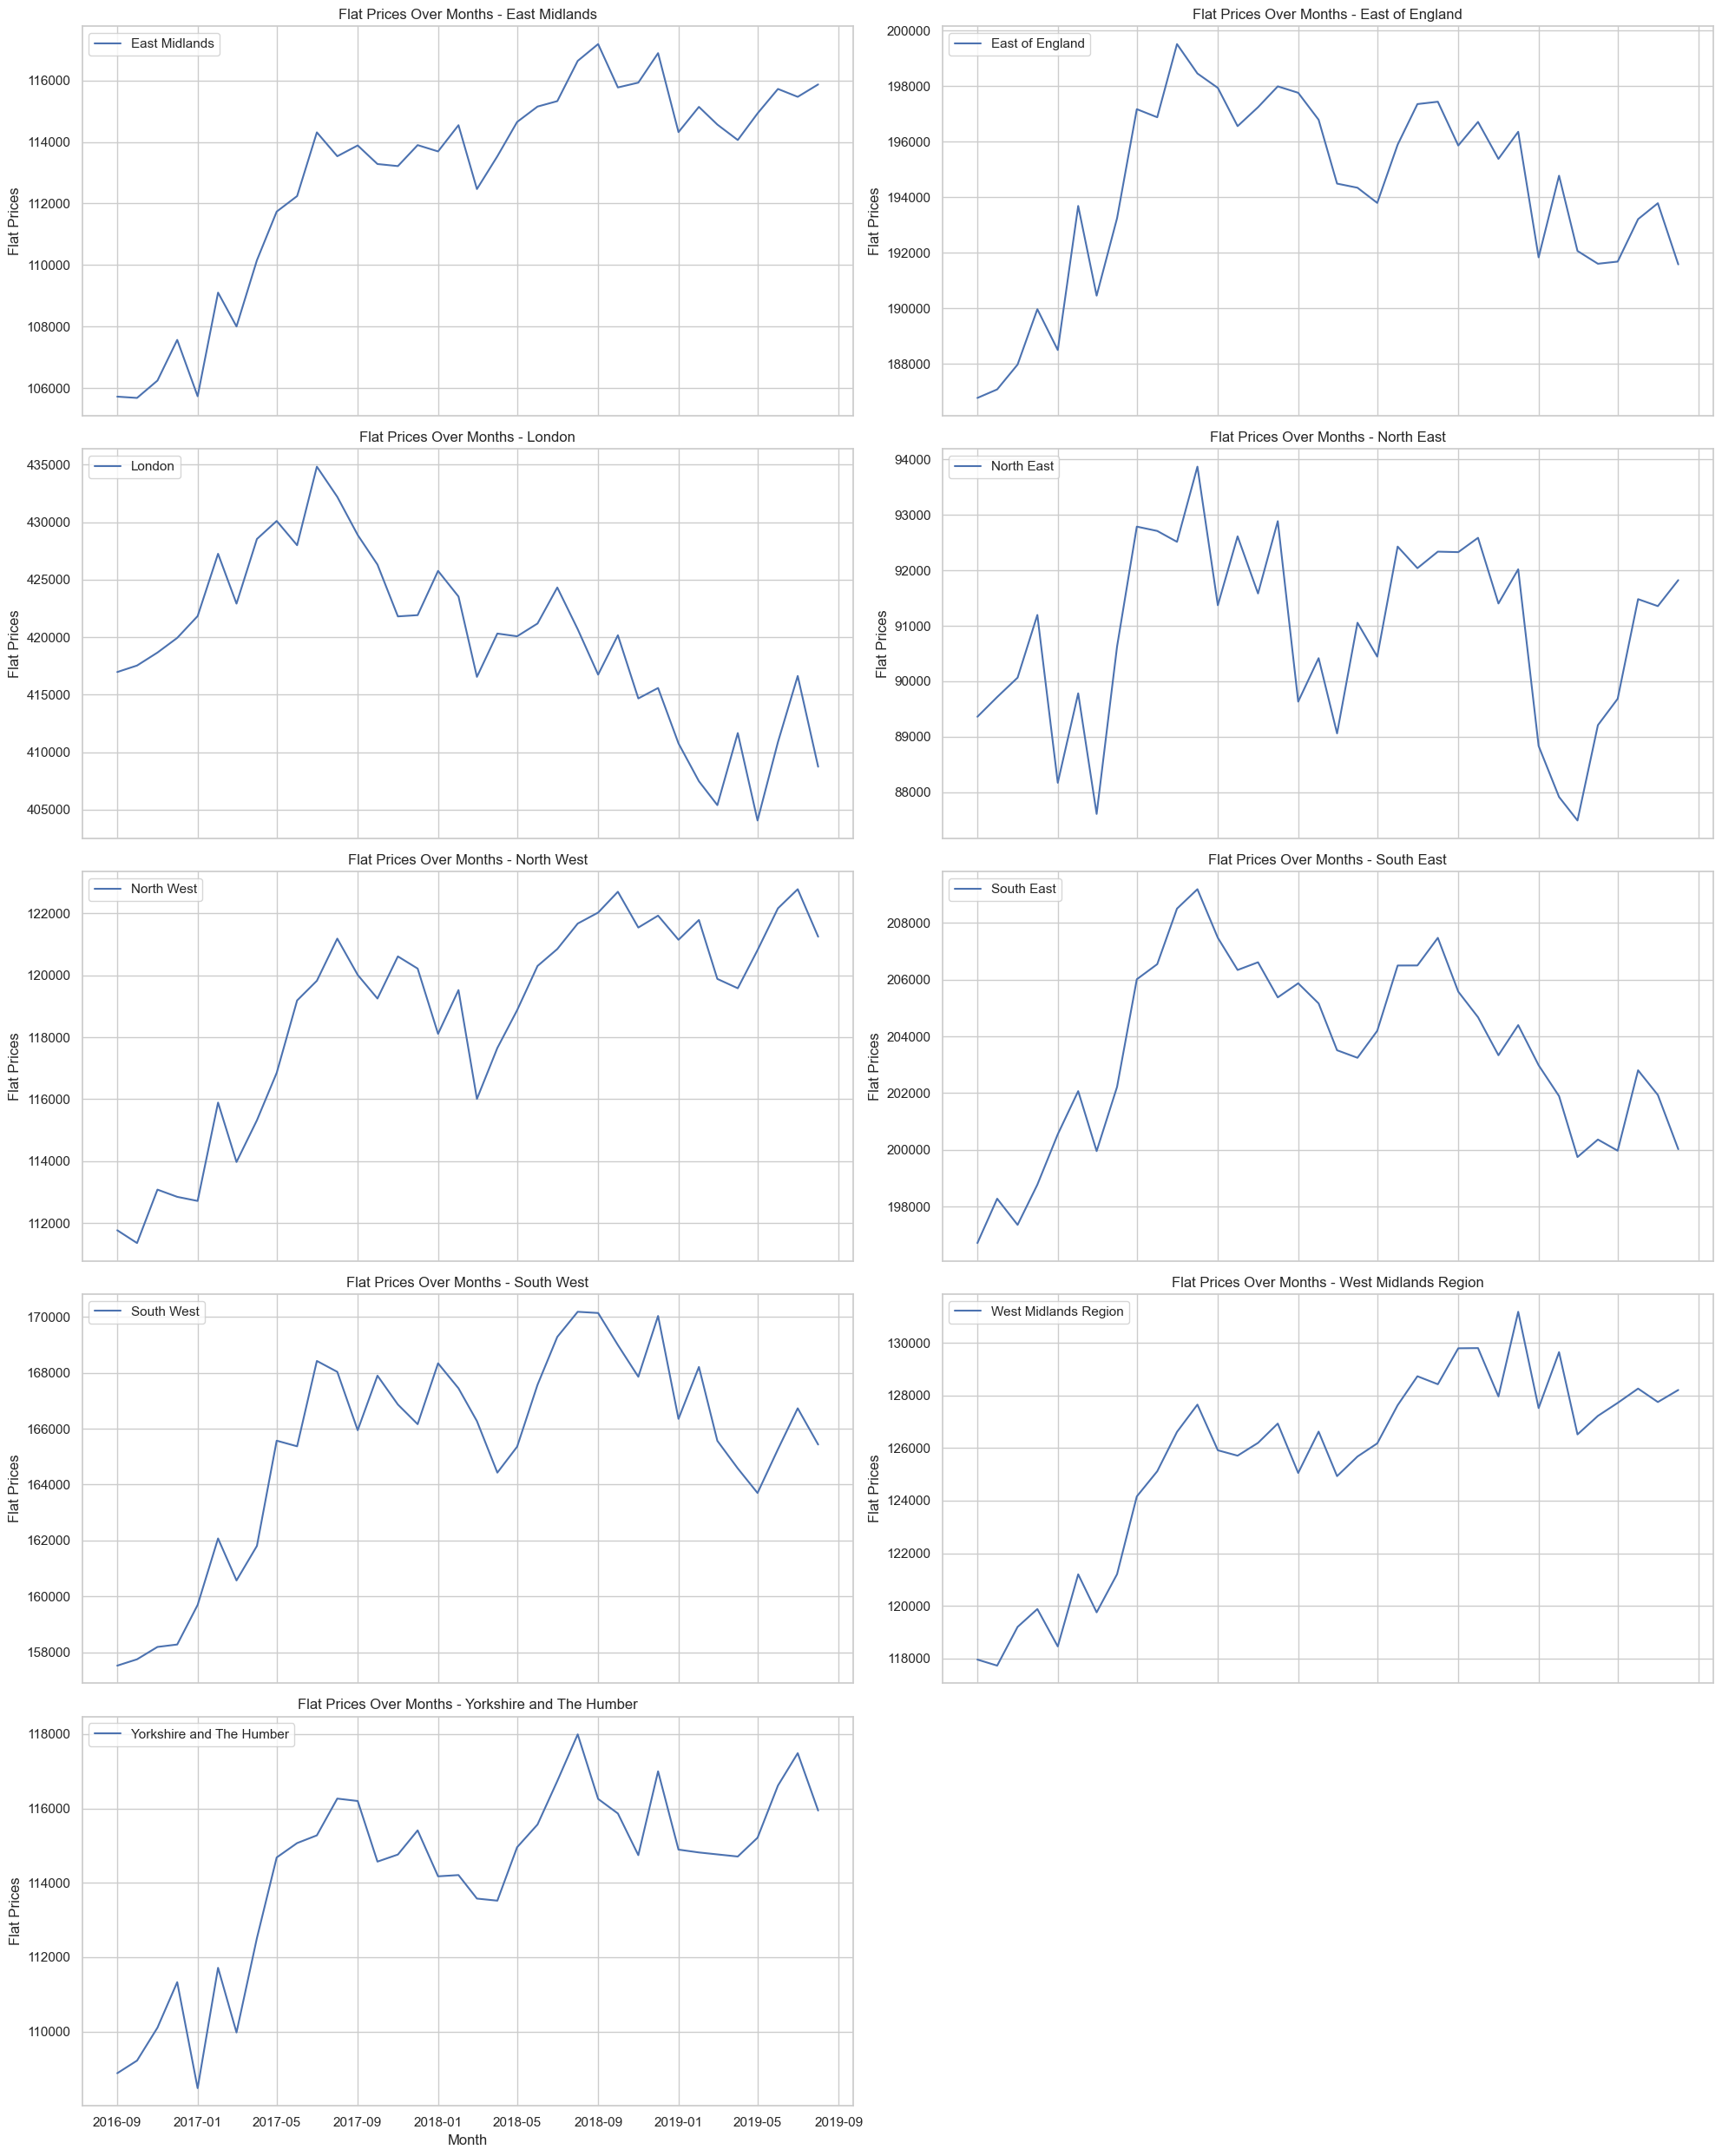

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

def prices_by_region(property_type, regiondf):
    
    pivot_df = regiondf.pivot(index='Month', columns='Area', values=property_type)

    # Plotting separate subplots for each region
    regions = pivot_df.columns

    # Finds the number of rows and columns for the grid
    num_cols = 2
    num_rows = (len(regions) + num_cols - 1) // num_cols

    # Creates subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows), sharex=True)

    axes = axes.flatten()

    for i, region in enumerate(regions):
        
        # Determines the position in the grid
        row = i // num_cols
        col = i % num_cols

        axes[i].plot(pivot_df.index, pivot_df[region], label=region)
        axes[i].set_title(f'{property_type} Prices Over Months - {region}')
        axes[i].set_ylabel(f'{property_type} Prices')
        axes[i].grid(True)
        axes[i].legend(loc='upper left')
        
    # Hides unused subplot
    for j in range(len(regions), num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.xlabel('Month')
    plt.tight_layout()
    plt.show()

   

prices_by_region('Flat', regiondf)



The graphs show that for the vast majority of regions, the price level increased over the timeframe (in terms of starting and end positions). Interestingly, the only region in which the prices were lower at the end of the period is London. As such, as one would expect, property is more expensive in most of our regions than it was at the end of 2016 (beginning of our timeframe). 

Each region displays persistent price fluctuations. The prices in general are very volatile, albeit to different degrees. The North East seems to be the most unstable. The South East prices are the most similar to it's Northern counterpart, although it remains unique. Many of the significant dips are shared across regions. As such, some external factors clearly influence all regional prices. In most cases the key difference seems to be the varying magnitude of the drops and the following rises.  

Every region showed a steady increase between September 2016, and September 2017. The only region with a significant dip throughout this period is the North East. However, the North Eastern prices similarly shot up towards the middle of 2017, in which the region's prices peaked. 

The flat prices for all regions share a similar trend throughout 2018; all exhibiting the same large dip at the beginning of 2018 and rising again throughout the year, with the North Eastern prices facing further small fluctuations during this period. Towards the end of the year and past this point is when the trend variation develops across regions. Some prices generally continue to rise (with small changes) and some begin to face a steady decline towards the end of our timeframe (e.g. London). The majority face the same dip in 2019, albeit to varying degrees. Although there is recovery towards the end of the year, for the North East this 2019 drop is drastic.

Despite clear volatility across all regions, many of the trends are similar to an extent. For these cases it is the varying magnitudes of their shared fluctuations which define the difference. There are, however, a few regions whose flat price trends differ significantly. These being London and the North East in particular. 

### Section 3.2: Detached Prices By Region

Now we will plot similar graphs as in 3.1 but for detached property prices (see below).

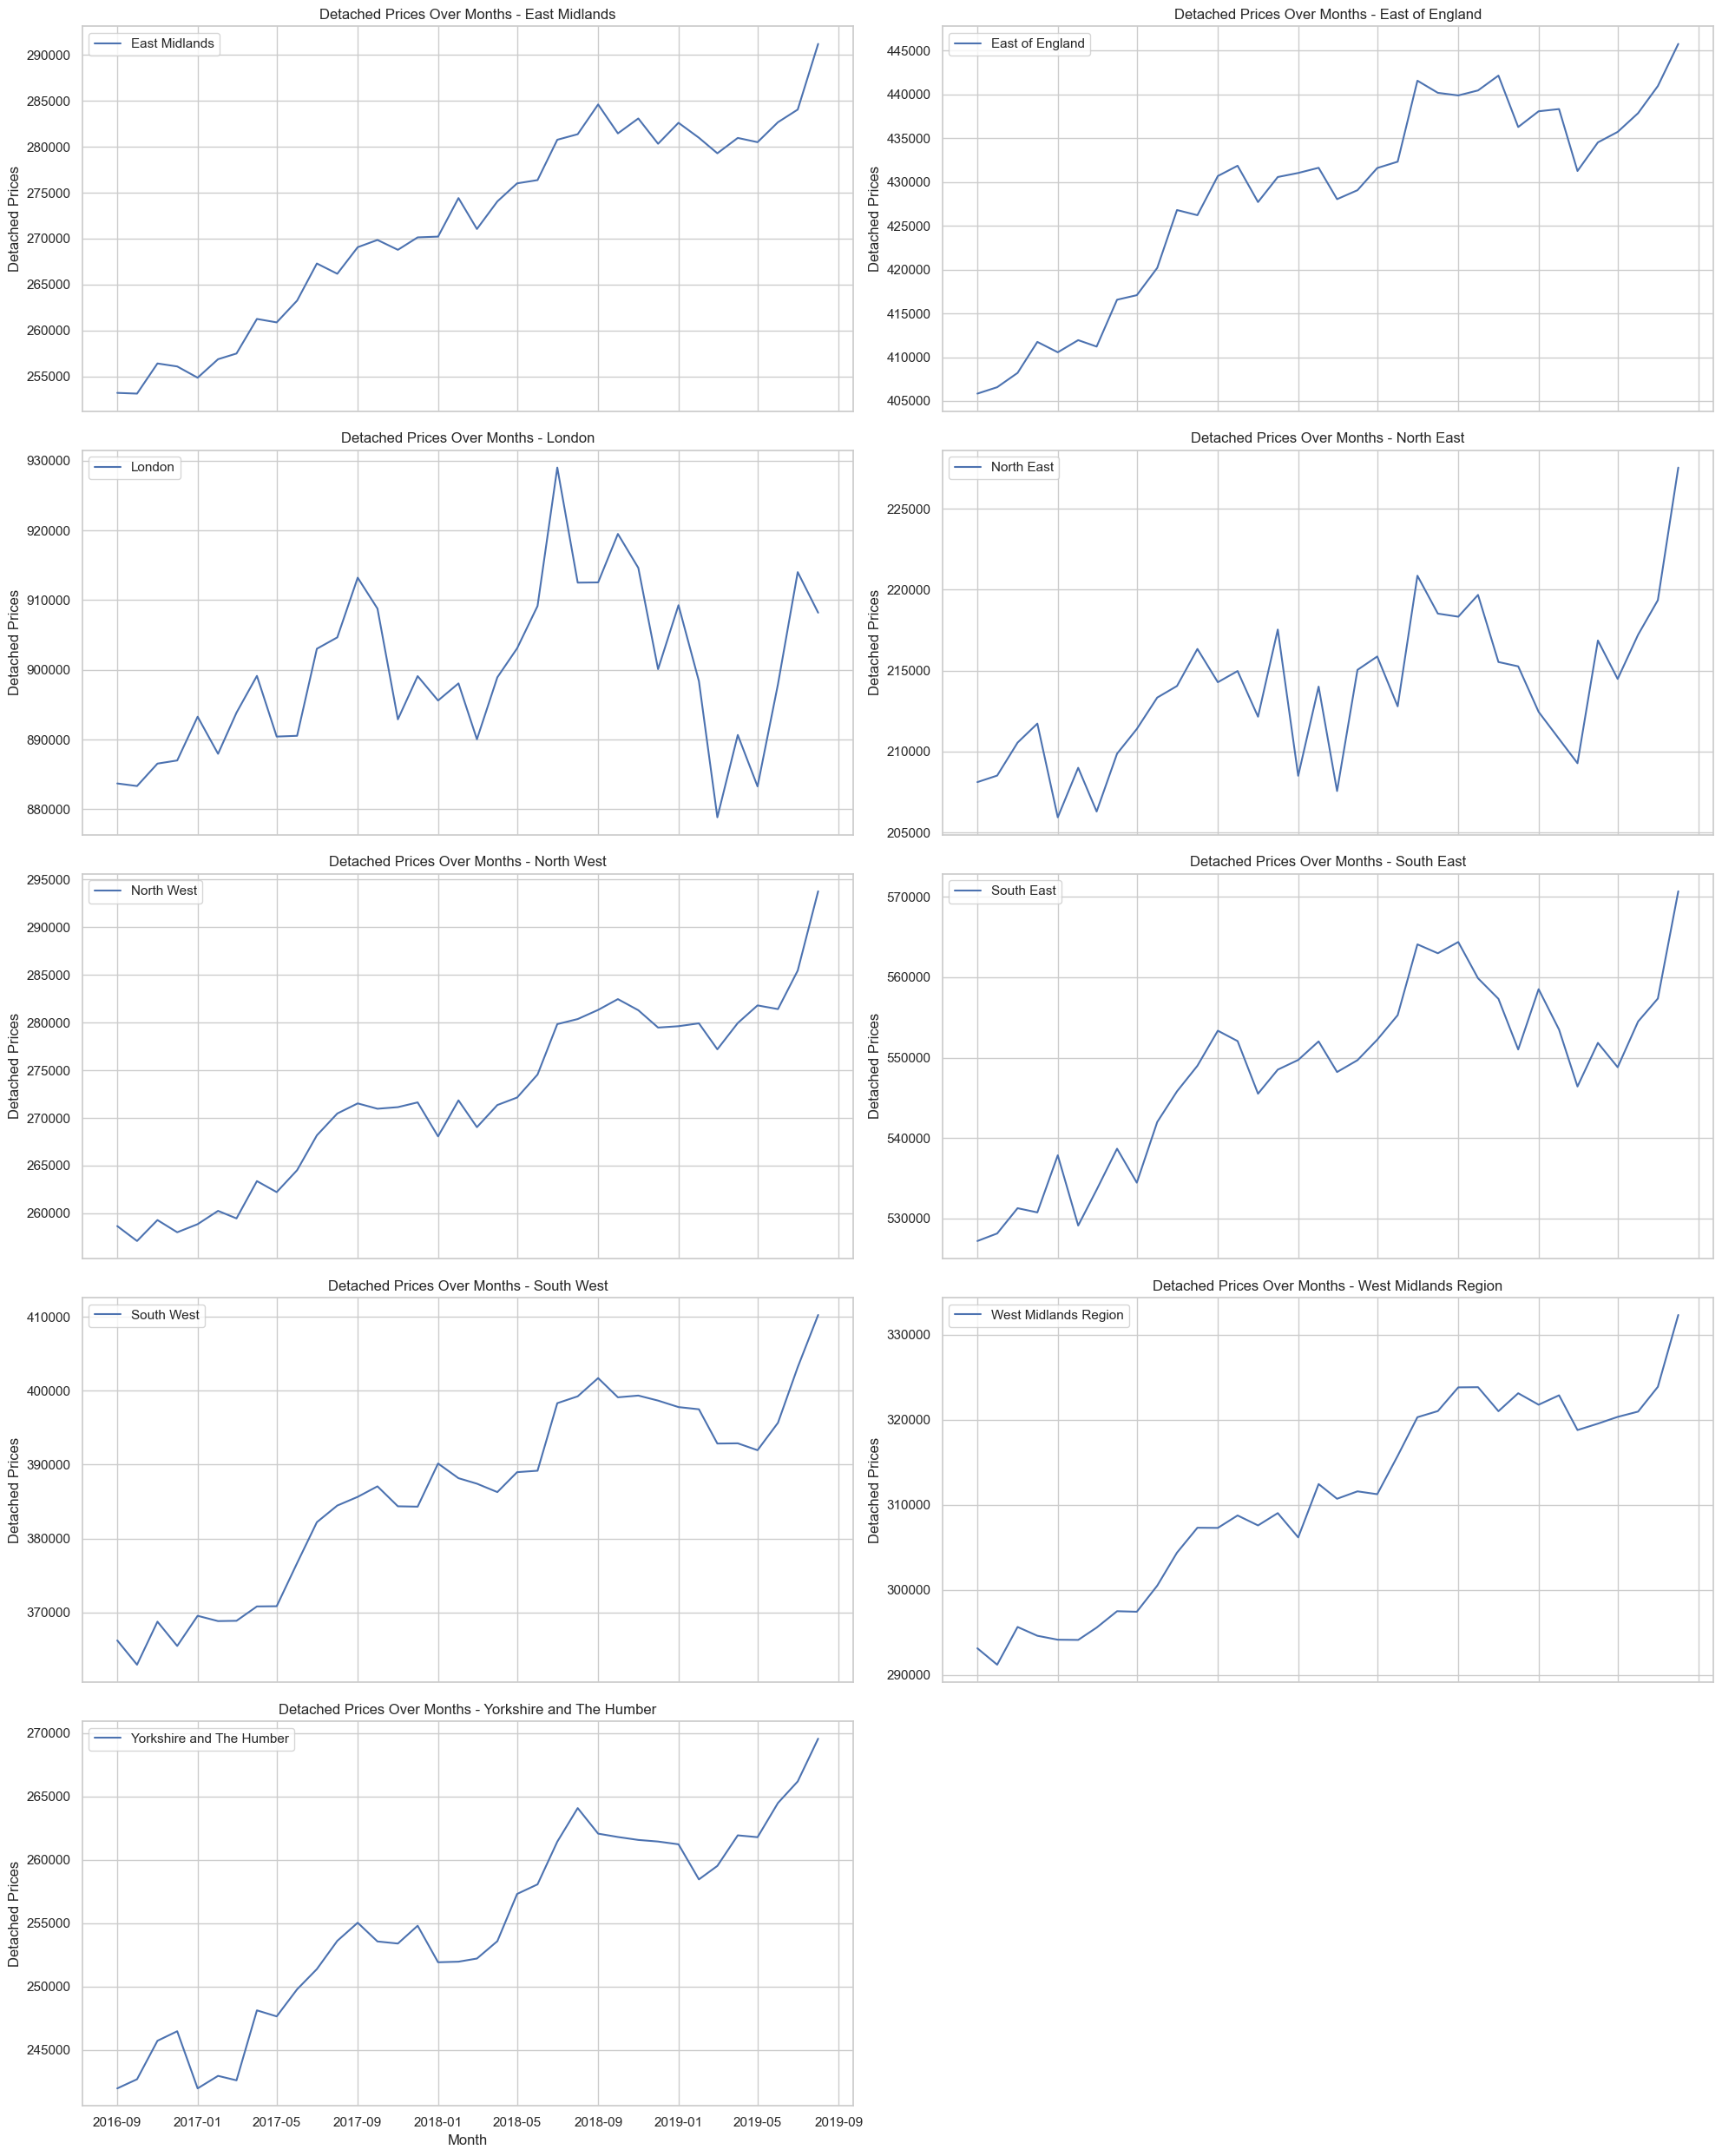

In [57]:
prices_by_region('Detached', regiondf)

From analysing the plots above we can see that the regional price trends for detached properties tend to be more stable, exhibiting a lesser degree of fluctuations. Many of the regions have faced a steadier price increase throughout the timeframe, relative to their flat prices.

All of the regions share the previously cited 2018 and 2019 drop for their detached properties; although this is seemingly less severe for detached properties than flats in most regions. Again, the North East faces the largest dip during the 2019 period. London's detached prices fall more drastically here than it's flat prices. In general, the London detached prices seem to be more volatile, displaying sharp fluctuations of greater magnitudes. Interestingly, it now exhibits a similar shape to that of the North Eastern detached trend.

There are some similar patterns between detached and flat trends. Both of which show the same steady increase throughout the first year of our timeframe (2016-09 to 2017-09). Additionally, the general flat prices across the majority of regions ended on a higher final value than their starting point, bar London. This is the same for detached, except the London prices now share this trait.

Conclusively, the price trends for detached prices for each region tend to be more stable, facing steadier increases, exhibiting less volatility and hence, unpredictability. As such, the trends are more similar across regions than they were for flat prices. Again, London and the North East appear to have the most unique trends, displaying more unique variations to an extent. However, the plots for both regions show that the detached price trends are more closely matched to the other regions than their flat price trends. Additionally, the North Eastern prices now seem to follow a trend not too far away from the South Eastern.

## Section 4: Price Changes

In this section we investigate the change in the price of flats in each area between July 2017 and July 2018. To do this, we first create separate tables from our original area data with only the values for July 2017 and 2018. We then merge these two tables and compute a 'Difference' column, displaying the overall price change between these two points. After this, we plot two separate graphs to visualise this change (i.e. 'Difference'). Firstly, we compute bar charts for each region, showing the price change for all the areas within it. Our second graphic shows the average price change for each region as a whole.

### Section 4.1: Data Formatting

The code below displays the creation of the table required for the graphics.

In [58]:
# Selects columns needed
newArea = newArea[['Area', 'Flat', 'Month', 'RegionName']]

# Selects July 2017 and 2018 values in two different dataframes
july2017 = newArea.loc[newArea.Month == '2017-07-01']
july2018 = newArea.loc[newArea.Month == '2018-07-01']

# Renames
july2017 = july2017.rename(columns = {'Flat':'Flat2017'})
july2018 = july2018.rename(columns = {'Flat':'Flat2018'})

# Drops month column
july2017 = july2017.drop(columns='Month')
july2018 = july2018.drop(columns='Month')

# Merges 2017 and 2018 data
price_change = july2017.merge(july2018, left_on = ('Area', 'RegionName'), right_on = ('Area', 'RegionName'), how = 'left')
price_change = price_change.assign(Difference = price_change.Flat2017 - price_change.Flat2018)

# Moves RegionName column to end
price_change = price_change[[col for col in price_change.columns if col != 'RegionName'] + ['RegionName']]

price_change



,Area,Flat2017,Flat2018,Difference,RegionName
0,Hartlepool,65007.84170,61116.82158,3891.02012,North East
1,Middlesbrough,69163.06963,69313.90788,-150.83825,North East
2,Redcar and Cleveland,65507.80990,64802.79724,705.01266,North East
3,Stockton-on-Tees,83599.32806,83654.55272,-55.22466,North East
4,Darlington,87041.37973,83679.31818,3362.06155,North East
...,...,...,...,...,...
146,Suffolk,140278.18370,142488.46480,-2210.28110,East of England
147,Surrey,270116.52610,267144.69100,2971.83510,South East
148,Warwickshire,165676.94800,167470.71860,-1793.77060,West Midlands
149,West Sussex,193547.45490,191835.79530,1711.65960,South East


### Section 4.2: Visualisation

We now create the first visualisation, the area specific price changes per region. The next cell displays the code used to compute this.

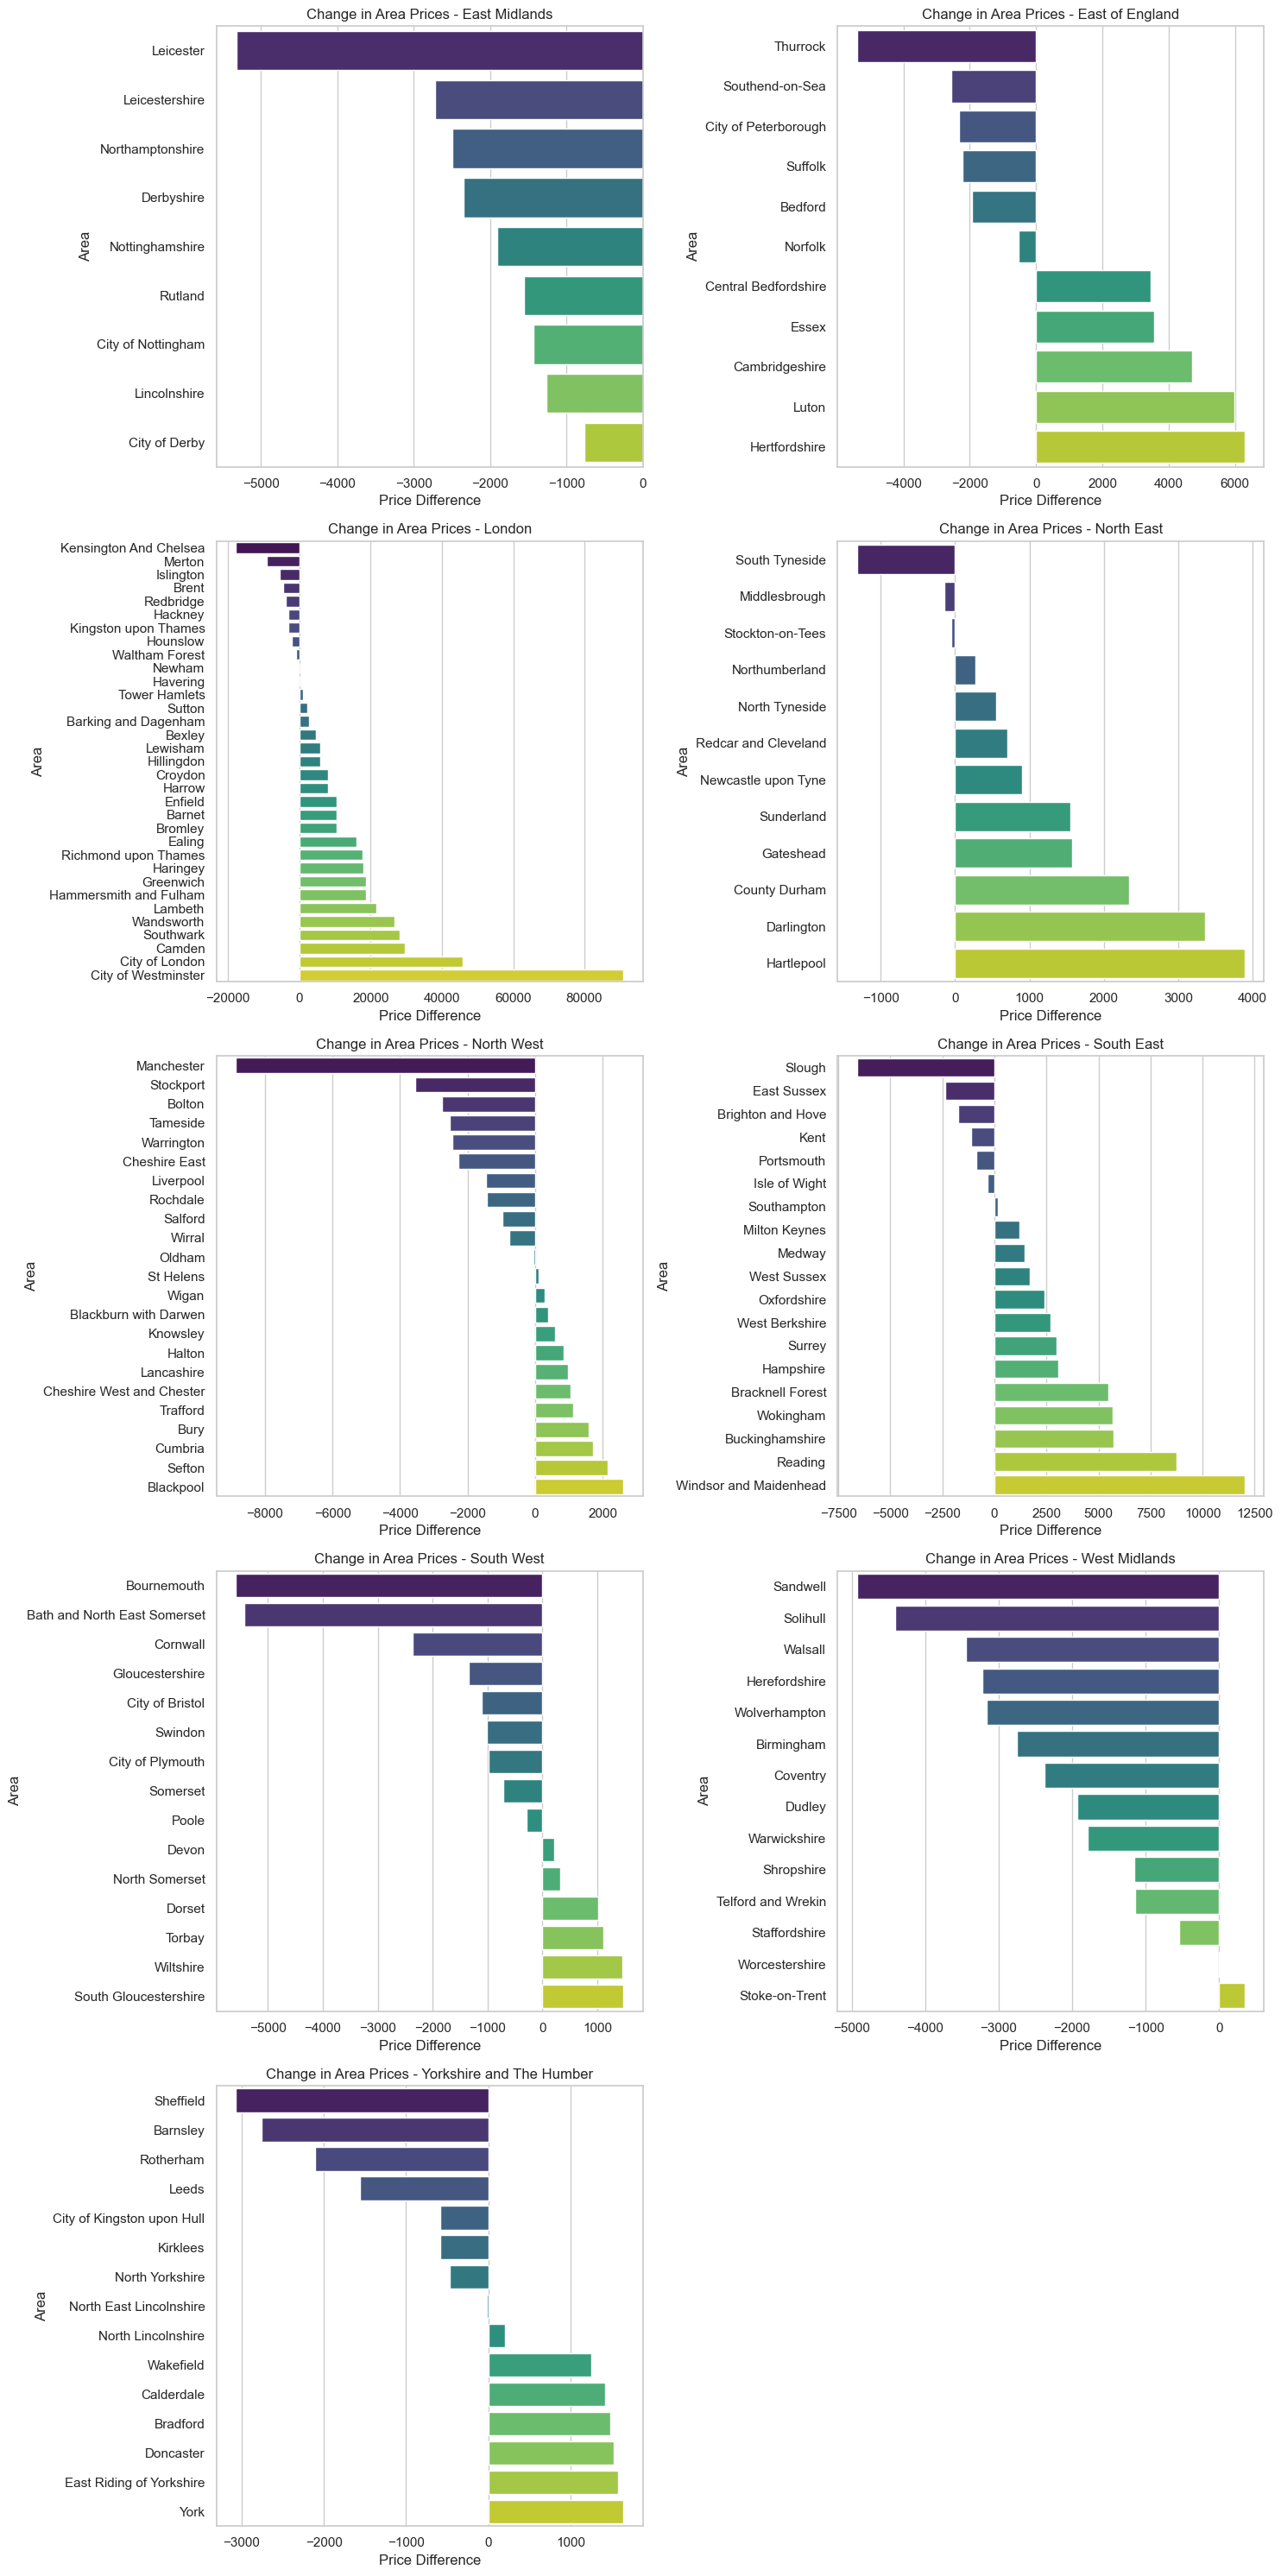

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sorts for visualisation
df = price_change.sort_values(by=['RegionName', 'Difference'])

# Style
sns.set(style="whitegrid")

# Subplots for each region
plt.figure(figsize=(15, 30))  

# Region names
regions = df['RegionName'].unique()

# Number of rows and columns needed for subplots
num_rows = (len(regions) + 1) // 2
num_cols = 2

# Plots subplot for each region
for i, region in enumerate(regions, start=1):
    plt.subplot(num_rows, num_cols, i)
    region_df = df[df['RegionName'] == region]
    
    sns.barplot(x='Difference', y='Area', data=region_df, palette='viridis')
    plt.title(f'Change in Area Prices - {region}')
    plt.xlabel('Price Difference')
    plt.ylabel('Area')

plt.tight_layout()
plt.show()

The graphics for the Midlands, East and West, show us that almost all of the areas within these regions decreased in price over the one year period, with the only area increasing in flat price (marginally) as Stoke-on Trent. These are the only regions with almost no areas increasing in value within this period.

As expected, the majority of London flat prices increased over the year, the properties within the City of Westminster in particular rose drastically.

Interestingly, many of the eastern regions generally have more areas with increasing property value than decreasing. In comparison, the western regions seem to have more with a decreased value. In order to investigate this in more detail we have plotted the average price change for each region below.


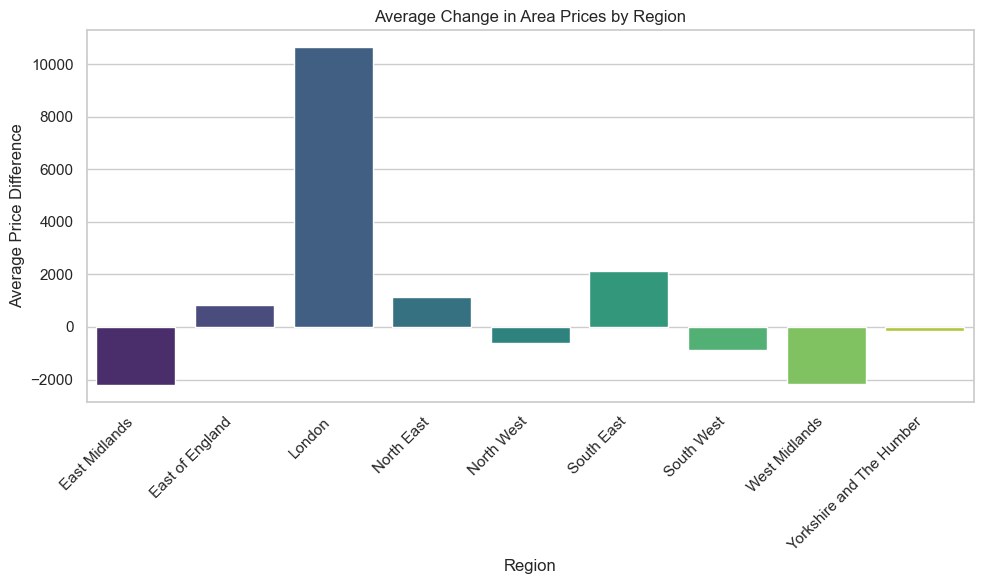

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = price_change.sort_values(by=['RegionName', 'Difference'])

# Calculates the mean difference for each region
average_diff_by_region = df.groupby('RegionName')['Difference'].mean().reset_index()

# Sets style
sns.set(style="whitegrid")

# Creates a bar plot for the average difference by region
plt.figure(figsize=(10, 6))
sns.barplot(x='RegionName', y='Difference', data=average_diff_by_region, palette='viridis')
plt.xlabel('Region')
plt.ylabel('Average Price Difference')
plt.title('Average Change in Area Prices by Region')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


Following on from our prior point, the eastern regions on average have increased in value over the year, whereas the western regions have decreased. The Midlands appears to be an exception to the rule with both the western and eastern prices losing value. As expected, London flats have increased in price by a significantly larger amount than any other region.

## Section 5: Statistical Analysis

In this section we utilise a chi-squared test (using the G-test statistic) to investigate whether the flat price variation has occurred similarly across regions. As such, our null hypothesis assumes that there is no association between region and flat price changes. In other words, we use the test to determine if there is independence between these variables in the context of house prices. The prior dissection of the pricing data would imply that the null would likely be rejected.

### Section 5.1: Cross Tabulation

We begin by creating a 'Change' column for the dataframe created in the prior section (including the 2017 and 2018 price). We then cross-tabulate the number of areas in which the price has increased and decreased by region. This format allows us to conduct our chi-squared test.


In [61]:
def change_checker(row):
    if row.Flat2017 > row.Flat2018:
        return 'Decrease'
    if row.Flat2017 < row.Flat2018:
        return 'Increase'
    
price_change = price_change.assign(Change = price_change.apply(change_checker, axis=1))
price_change.Change = price_change.Change.astype('category')


We now cross-tabulate the above dataframe to create the table below which next section's test will be conducted on. The test will determine whether there is an association between the variables in this table.

In [62]:
table = pd.crosstab(index=price_change['Change'], columns=price_change['RegionName'])

table

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


### Section 5.2: Chi-Squared Test

The code in the next cell is the implementation of our chi-squared test on our table. The G-test statistic is our test statistic for this test. It is calculated by comparing the log likelihoods of the observed data under the null hypothesis (i.e. independence of price change and region) and the alternative hypothesis. The larger the G-test statistic, the larger the discrepancys between the observed data and what we expected under the null. The p-value signifies the probability of obtaining our test statistic value under the null hypothesis. This value is then compared to the significance level to determine whether we reject the null (that there is not an association between region and flat prices).

In [63]:
import scipy.stats as stats

test_stat, p_value, dof, expected = stats.chi2_contingency(table, correction=False, 
                                                           lambda_ = "log-likelihood")
print('The G test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))
print('There are %d degrees of freedom' % dof)

The G test statistic is 32.19
The p-value is 0.009 %
There are 8 degrees of freedom



We have a G-test statistic of 32.19. The p-value associated with our statistic is 0.009 percent. The conventional significance level is 0.05. As you can see, the p value is significantly below this; as such, we reject the null hypothesis. We are confirming that the variance in area prices across regions is significantly different and that this variation is not due to chance. We postulate that there is sufficient evidence of an association between the region and flat pricing. The analyses of the former sections reinforces this conclusion.

It is important, however, to note that despite the presence of an association, this does not imply causality. This test is not sufficient in making this assumption. Similarly, more information is required to determine the relational direction. We would need further research and the assistance of a domain-expert to truly understand this relationship.
